# Task 4 : Disease Prediction from Medical Data 

Create a model to predict the likelihood of a disease
based on medical data (e.g., symptoms, patient
history). Use datasets with labeled medical records and
apply classification algorithms.

Dataset Source - https://www.kaggle.com/datasets/data855/heart-disease

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data= pd.read_csv('C:\\Users\\EliteBook\\Documents\\Research\\Machine Learning\\CodeAlpha\\Project 1\\heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data_copy= pd.read_csv('C:\\Users\\EliteBook\\Documents\\Research\\Machine Learning\\CodeAlpha\\Project 1\\heart.csv') 

In [4]:
data.shape

(303, 14)

In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Rename the variables

In [7]:
data = data.rename(
    columns = {
        'cp': 'chest_pain_type',               
        'trestbps': 'resting_blood_pressure', 
        'chol': 'cholesterol',                 
        'fbs': 'fasting_blood_sugar',          
        'restecg': 'resting_electrocardiogram',
        'thalach': 'max_heart_rate_achieved',  
        'exang': 'exercise_induced_angina',    
        'oldpeak': 'st_depression',            
        'slope': 'st_slope',                   
        'ca': 'num_major_vessels',             
        'thal': 'thalassemia'                  
    }, 
    errors="raise"  
    # Ensure that any errors during the renaming process will be explicitly raised as exceptions
)


In [8]:
data

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Converting numerical values in certain columns to categorical labels

In [9]:
data.replace({
    'sex': {0: 'female', 1: 'male'},
    'chest_pain_type': {0: 'typical angina', 1: 'atypical angina', 2: 'non-anginal pain', 3: 'asymptomatic'},
    'fasting_blood_sugar': {0: 'lower than 120mg/ml', 1: 'greater than 120mg/ml'},
    'resting_electrocardiogram': {0: 'normal', 1: 'ST-T wave abnormality', 2: 'left ventricular hypertrophy'},
    'exercise_induced_angina': {0: 'no', 1: 'yes'},
    'st_slope': {0: 'upsloping', 1: 'flat', 2: 'downsloping'},
    'thalassemia': {1: 'fixed defect', 2: 'normal', 3: 'reversable defect'}
}, inplace=True)


In [10]:
data

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,fixed defect,1
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,normal,1
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,normal,1
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,downsloping,0,normal,1
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,downsloping,0,normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,female,typical angina,140,241,lower than 120mg/ml,ST-T wave abnormality,123,yes,0.2,flat,0,reversable defect,0
299,45,male,asymptomatic,110,264,lower than 120mg/ml,ST-T wave abnormality,132,no,1.2,flat,0,reversable defect,0
300,68,male,typical angina,144,193,greater than 120mg/ml,ST-T wave abnormality,141,no,3.4,flat,2,reversable defect,0
301,57,male,typical angina,130,131,lower than 120mg/ml,ST-T wave abnormality,115,yes,1.2,flat,1,reversable defect,0


In [11]:
def change_label(value):
    if value ==1:
        return 'Disease detected'
    else:
        return 'No Disease detected'

In [12]:
data['target']= data['target'].apply(change_label)

In [13]:
data

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,fixed defect,Disease detected
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,normal,Disease detected
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,normal,Disease detected
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,downsloping,0,normal,Disease detected
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,downsloping,0,normal,Disease detected
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,female,typical angina,140,241,lower than 120mg/ml,ST-T wave abnormality,123,yes,0.2,flat,0,reversable defect,No Disease detected
299,45,male,asymptomatic,110,264,lower than 120mg/ml,ST-T wave abnormality,132,no,1.2,flat,0,reversable defect,No Disease detected
300,68,male,typical angina,144,193,greater than 120mg/ml,ST-T wave abnormality,141,no,3.4,flat,2,reversable defect,No Disease detected
301,57,male,typical angina,130,131,lower than 120mg/ml,ST-T wave abnormality,115,yes,1.2,flat,1,reversable defect,No Disease detected


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        303 non-null    int64  
 1   sex                        303 non-null    object 
 2   chest_pain_type            303 non-null    object 
 3   resting_blood_pressure     303 non-null    int64  
 4   cholesterol                303 non-null    int64  
 5   fasting_blood_sugar        303 non-null    object 
 6   resting_electrocardiogram  303 non-null    object 
 7   max_heart_rate_achieved    303 non-null    int64  
 8   exercise_induced_angina    303 non-null    object 
 9   st_depression              303 non-null    float64
 10  st_slope                   303 non-null    object 
 11  num_major_vessels          303 non-null    int64  
 12  thalassemia                303 non-null    object 
 13  target                     303 non-null    object 

target-
0=No disease,
1=disease avaialable

See the distribution of target variable

<Axes: xlabel='target', ylabel='count'>

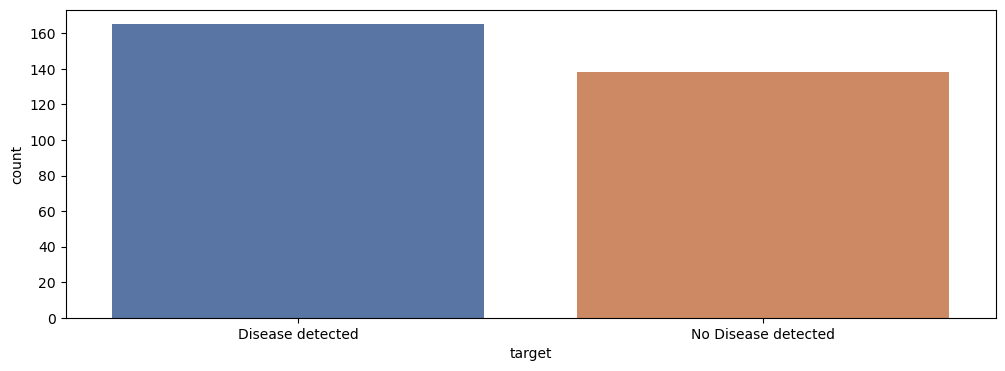

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(12, 4))
sns.countplot(x='target', data=data, palette='deep', ax=ax)


<Axes: xlabel='target', ylabel='count'>

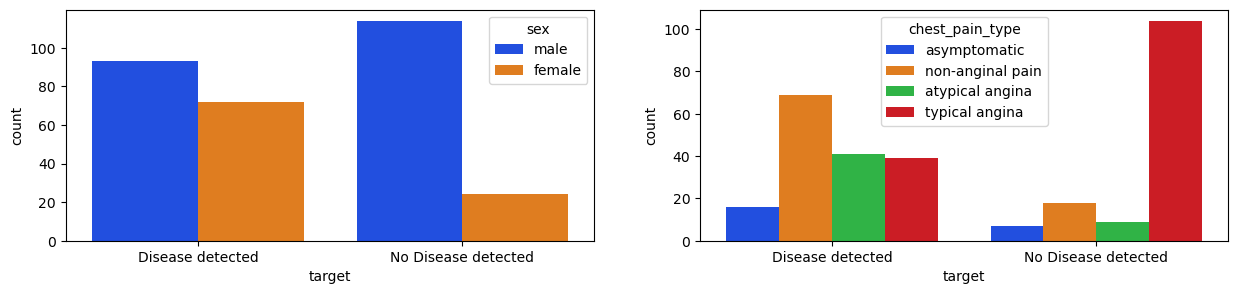

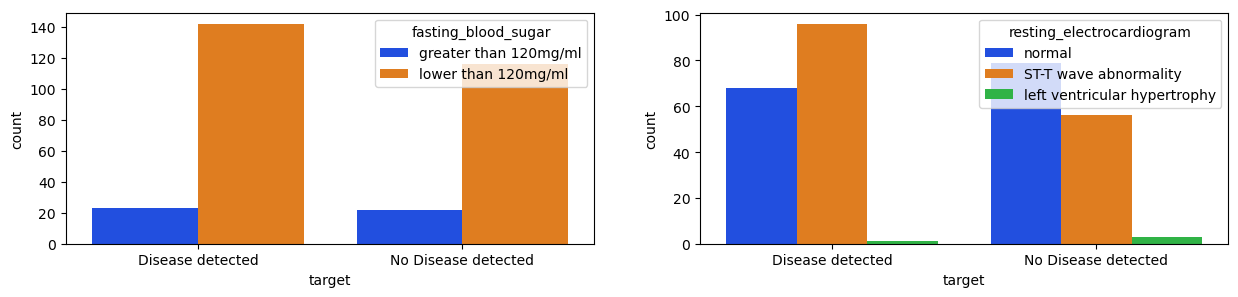

In [16]:
#  Each target value is further differentiated by the 'sex' variable male or female &  different types of chest pain
fig, ax = plt.subplots(1, 2,figsize=(15,3))
sns.countplot(x='target',data=data,palette='bright',hue='sex',ax=ax[0])
sns.countplot(x='target',data=data,palette='bright',hue='chest_pain_type',ax=ax[1])

# Each target value is differentiated by the level of fasting blood sugar ('lower than 120mg/ml' and 'greater than 120mg/ml')
# &  different types of resting electrocardiogram results
fig, ax = plt.subplots(1, 2,figsize=(15,3))
sns.countplot(x='target',data=data,palette='bright',hue='fasting_blood_sugar',ax=ax[0])
sns.countplot(x='target',data=data,palette='bright',hue='resting_electrocardiogram',ax=ax[1])


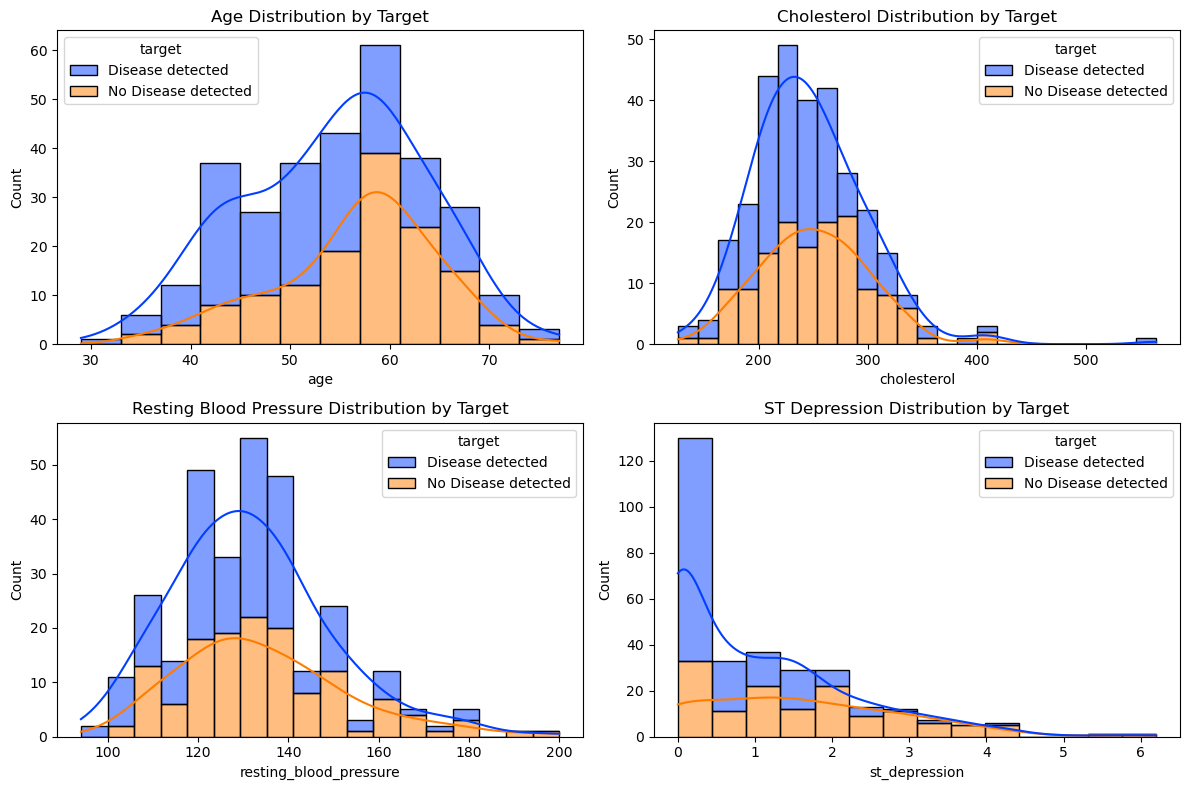

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot histograms for 'age', 'cholesterol', 'resting_blood_pressure', and 'st_depression'
sns.histplot(data=data, x='age', hue='target', multiple='stack', ax=axes[0, 0], palette='bright', kde=True)
sns.histplot(data=data, x='cholesterol', hue='target', multiple='stack', ax=axes[0, 1], palette='bright', kde=True)
sns.histplot(data=data, x='resting_blood_pressure', hue='target', multiple='stack', ax=axes[1, 0], palette='bright', kde=True)
sns.histplot(data=data, x='st_depression', hue='target', multiple='stack', ax=axes[1, 1], palette='bright', kde=True)

# Set titles for each subplot
axes[0, 0].set_title('Age Distribution by Target')
axes[0, 1].set_title('Cholesterol Distribution by Target')
axes[1, 0].set_title('Resting Blood Pressure Distribution by Target')
axes[1, 1].set_title('ST Depression Distribution by Target')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


<Axes: >

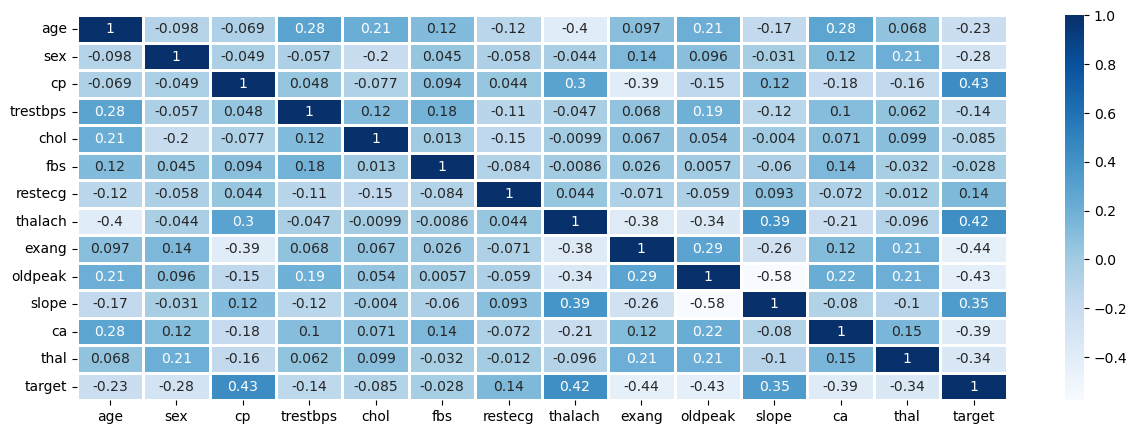

In [18]:
# Correlation matrix 

plt.figure(figsize=(15,5))
sns.heatmap(data_copy.corr(),cmap='Blues',annot=True,linewidths=1,linecolor='white')

In [19]:
# Calculate Pearson correlation coefficients
pearson_corr = data_copy.corr(method='pearson')

print("Pearson Correlation Coefficients:")
pearson_corr


Pearson Correlation Coefficients:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


# Data Modeling

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = data_copy.drop('target',axis=1)
y = data_copy['target']

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
from sklearn.metrics import classification_report,accuracy_score,precision_score,f1_score,recall_score

In [24]:
accuracy = []
recall = []
precision =[]
f1 = []

In [25]:
L = ['KNN','Random Forest','Decision Tree','SVC']

# K Nearest Neighbours

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
kNN=KNeighborsClassifier(n_neighbors=10)

In [28]:
kNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [30]:
y_pred=kNN.predict(X_test)

In [31]:
print("ClassificationReport=")
print(classification_report(y_test,y_pred))

ClassificationReport=
              precision    recall  f1-score   support

           0       0.68      0.72      0.70        29
           1       0.73      0.69      0.71        32

    accuracy                           0.70        61
   macro avg       0.71      0.71      0.70        61
weighted avg       0.71      0.70      0.71        61



In [32]:
print("Accuracy using KNeighborsClassifier = ",accuracy_score(y_test,y_pred))

Accuracy using KNeighborsClassifier =  0.7049180327868853


In [33]:
accuracy.append(accuracy_score(y_test,y_pred))
recall.append(recall_score(y_test,y_pred))
precision.append(precision_score(y_test,y_pred))
f1.append(f1_score(y_test,y_pred))

# Random Forest Classification

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
RandomForest = RandomForestClassifier(n_estimators=10)

In [36]:
RandomForest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [37]:
y_pred =RandomForest.predict(X_test)

In [38]:
print("ClassificationReport=")
print(classification_report(y_test,y_pred))

ClassificationReport=
              precision    recall  f1-score   support

           0       0.74      0.86      0.79        29
           1       0.85      0.72      0.78        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61



In [39]:
print("Accuracy using Random Forest Classifier = ",accuracy_score(y_test,y_pred))

Accuracy using Random Forest Classifier =  0.7868852459016393


In [40]:
accuracy.append(accuracy_score(y_test,y_pred))
recall.append(recall_score(y_test,y_pred))
precision.append(precision_score(y_test,y_pred))
f1.append(f1_score(y_test,y_pred))

# Decision Tree Classification

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
DecisionTree = DecisionTreeClassifier()

In [43]:
DecisionTree.fit(X_train,y_train)

DecisionTreeClassifier()

In [44]:
y_pred = DecisionTree.predict(X_test)

In [45]:
print("ClassificationReport=")
print(classification_report(y_test,y_pred))

ClassificationReport=
              precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.89      0.75      0.81        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



In [46]:
print("Accuracy using Decision Tree Classifier = ",accuracy_score(y_test,y_pred))

Accuracy using Decision Tree Classifier =  0.819672131147541


In [47]:
accuracy.append(accuracy_score(y_test,y_pred))
recall.append(recall_score(y_test,y_pred))
precision.append(precision_score(y_test,y_pred))
f1.append(f1_score(y_test,y_pred))

# Support Vector Machine

In [48]:
from sklearn.svm import SVC

In [49]:
SupportVector = SVC(kernel='linear')

In [50]:
SupportVector.fit(X_train,y_train)

SVC(kernel='linear')

In [51]:
y_pred = SupportVector.predict(X_test)

In [52]:
print("ClassificationReport=")
print(classification_report(y_test,y_pred))

ClassificationReport=
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [53]:
print("Accuracy using Support vector Machine = ",accuracy_score(y_test,y_pred))

Accuracy using Support vector Machine =  0.8688524590163934


In [54]:
accuracy.append(accuracy_score(y_test,y_pred))
recall.append(recall_score(y_test,y_pred))
precision.append(precision_score(y_test,y_pred))
f1.append(f1_score(y_test,y_pred))

# Performance Evaluation

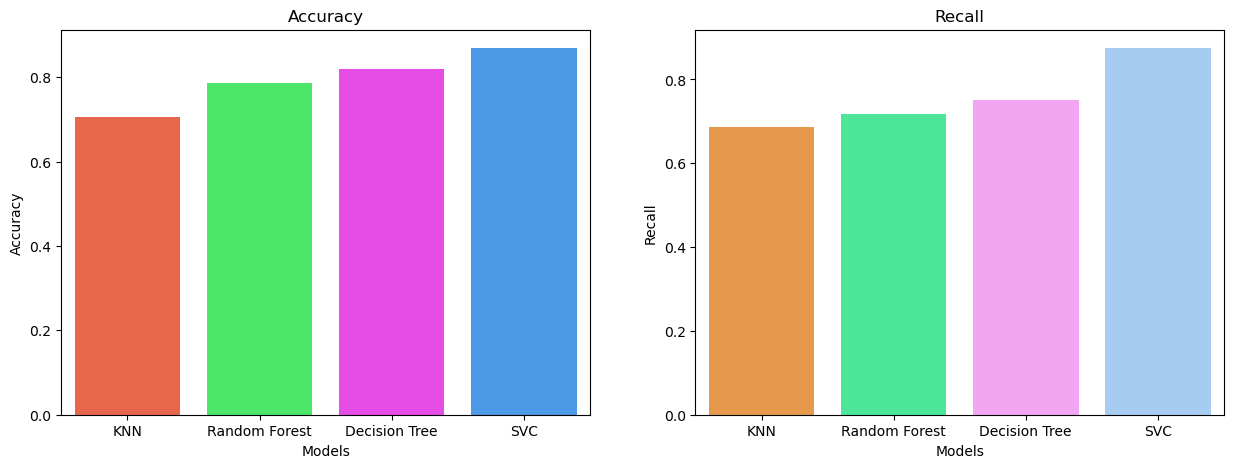

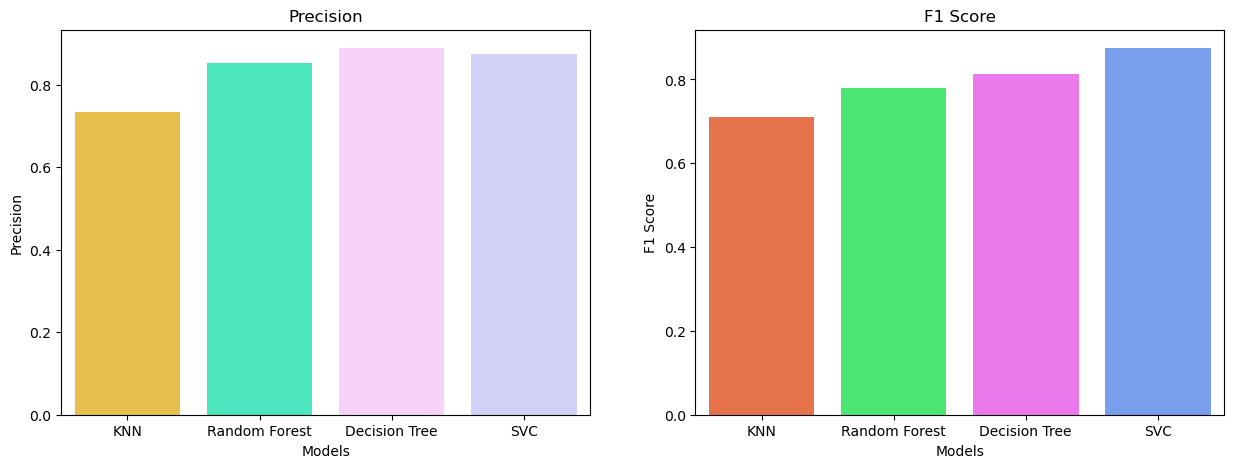

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom color palettes for each plot
accuracy_colors = ["#FF5733", "#33FF57", "#FF33FF", "#3399FF"]  
recall_colors = ["#FF9933", "#33FF99", "#FF99FF", "#99CCFF"]  
precision_colors = ["#FFCC33", "#33FFCC", "#FFCCFF", "#CCCCFF"]  
f1_colors = ["#FF6633", "#33FF66", "#FF66FF", "#6699FF"]  

# Accuracy and Recall Plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot Accuracy
sns.barplot(x=L, y=accuracy, palette=accuracy_colors, ax=ax1)
ax1.set_title("Accuracy")
ax1.set_ylabel("Accuracy")
ax1.set_xlabel("Models")

# Plot Recall
sns.barplot(x=L, y=recall, palette=recall_colors, ax=ax2)
ax2.set_title("Recall")
ax2.set_ylabel("Recall")
ax2.set_xlabel("Models")

# Precision and F1 Score Plots
fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(15, 5))

# Plot Precision
sns.barplot(x=L, y=precision, palette=precision_colors, ax=ax3)
ax3.set_title("Precision")
ax3.set_ylabel("Precision")
ax3.set_xlabel("Models")

# Plot F1 Score
sns.barplot(x=L, y=f1, palette=f1_colors, ax=ax4)
ax4.set_title("F1 Score")
ax4.set_ylabel("F1 Score")
ax4.set_xlabel("Models")

# Show the plots
plt.show()


After examining medical data with machine learning algorithms like K-Nearest Neighbors, Random Forest, Decision Tree, and Support Vector Machine, we discovered that Support Vector Machine performed the best. This suggests it could be a valuable tool for predicting diseases in real-world medical scenarios, showing how machine learning can aid healthcare decision-making.